# Finding K in KNN using Cross Validation and Intepretting Dimensions from Digit Dataset

In [121]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [39]:
digits = sklearn.datasets.load_digits()

X=digits.data
Y=digits.target

print(X.shape,Y.shape)

(1797, 64) (1797,)


Splitting train and test data. Making test data 33% of the data.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1203, 64) (594, 64)
(1203,) (594,)


In [41]:
1797*0.33

593.01

Text(0.5, 1.0, 'First Two PCs')

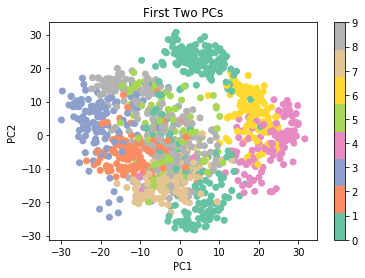

In [46]:
#creating svd model
svd = TruncatedSVD(n_components=2)
#centering the x data
X_train_center = X_train - X_train.mean(axis=0)
#fitting
x2d = svd.fit_transform(X_train_center)
#plot
plt.scatter(x2d[:,0],x2d[:,1],c=y_train,cmap='Set2')
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("First Two PCs")

Testing to see if two classes at once will help us see better

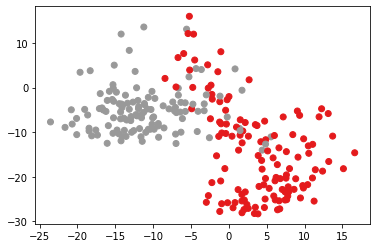

In [97]:
#creating svd for first two calsses only
svd2 = TruncatedSVD()
#class1x2d = x2d[x2d[]]
#display(pd.DataFrame(x2d))
ones = (y_train[:]==1)
twos = (y_train[:]==2)
condition = ones | twos
twoClass = plt.scatter(x2d[condition,0],x2d[condition,1],c=y_train[condition],cmap='Set1')

In [105]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':np.arange(1,20)}
knn_gscv = GridSearchCV(knn,param_grid,cv=10)
knn_gscv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
dim = [1,2,3,4,5,6,7,8,9,10]
knn = KNeighborsClassifier()
k,scores = [],[]
param_grid = {'n_neighbors':np.arange(1,20)}
for d in dim:
    #creating svd model
    svd = TruncatedSVD(n_components=d)
    #centering the x data
    X_train_center = X_train - X_train.mean(axis=0)
    #fitting
    x2d = svd.fit_transform(X_train_center)
    knn_gscv = GridSearchCV(knn,param_grid,cv=10)
    knn_gscv.fit(x2d,y_train)
    k.append(knn_gscv.best_params_['n_neighbors'])
    scores.append(knn_gscv.cv_results_['mean_test_score'])

In [141]:
k

[17, 18, 12, 6, 6, 4, 3, 3, 3, 1]

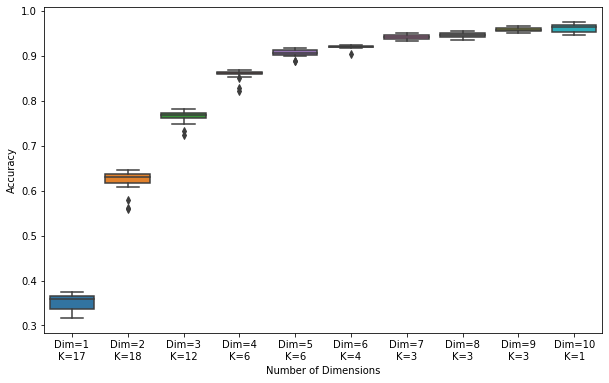

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(dim,scores)
plt.xlabel('Number of Dimensions')
plt.ylabel('Accuracy')
plt.xticks(range(len(dim)),[f"Dim={dim}\nK={n}" for dim, n in zip(dim,k)]);

The higher the dimension the lower the k value